In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [2]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(3)
pd.set_option('display.max_columns', None)

In [5]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [6]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [7]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [56]:
## Target column 
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45642
1     4296
Name: count, dtype: int64

In [11]:
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001,L00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001,L00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [12]:
df.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

In [13]:
df.dropna(inplace = True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00,49938.00
mean,39.55,2640638.53,1.94,16.02,419129.72,4704466.70,3999360.37,80488.96,719884.87,3199488.29,25.94,1337475.88,989071.73,0.09,2.50,1.00,76.12,4.88,26.86,5.01,43.36
std,9.85,2629411.02,1.54,8.93,168994.69,6267232.25,5376459.98,117322.24,967762.80,4301167.98,12.43,1214650.74,1046183.73,0.28,1.12,0.81,43.77,5.85,32.83,2.03,29.36
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,6.00,-1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1147000.00,967000.00,19340.00,174060.00,773600.00,16.00,424768.25,286904.25,0.00,1.00,0.00,42.00,0.00,0.00,4.00,18.00
50%,40.00,1891500.00,2.00,16.00,400001.00,2655000.00,2240000.00,44800.00,403200.00,1792000.00,24.00,1002239.00,668599.00,0.00,3.00,1.00,71.00,3.00,14.00,5.00,39.00
75%,46.00,3332000.00,3.00,24.00,560001.00,5172000.00,4610000.00,92220.00,829800.00,3688000.00,35.00,1790608.25,1238549.75,0.00,4.00,2.00,107.00,9.00,46.00,6.00,67.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5698029.90,8607420.00,38255200.00,59.00,5000000.00,7846643.00,1.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00


In [16]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [17]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'loan_purpose', 'loan_type']

### Box plot to visualize outliers

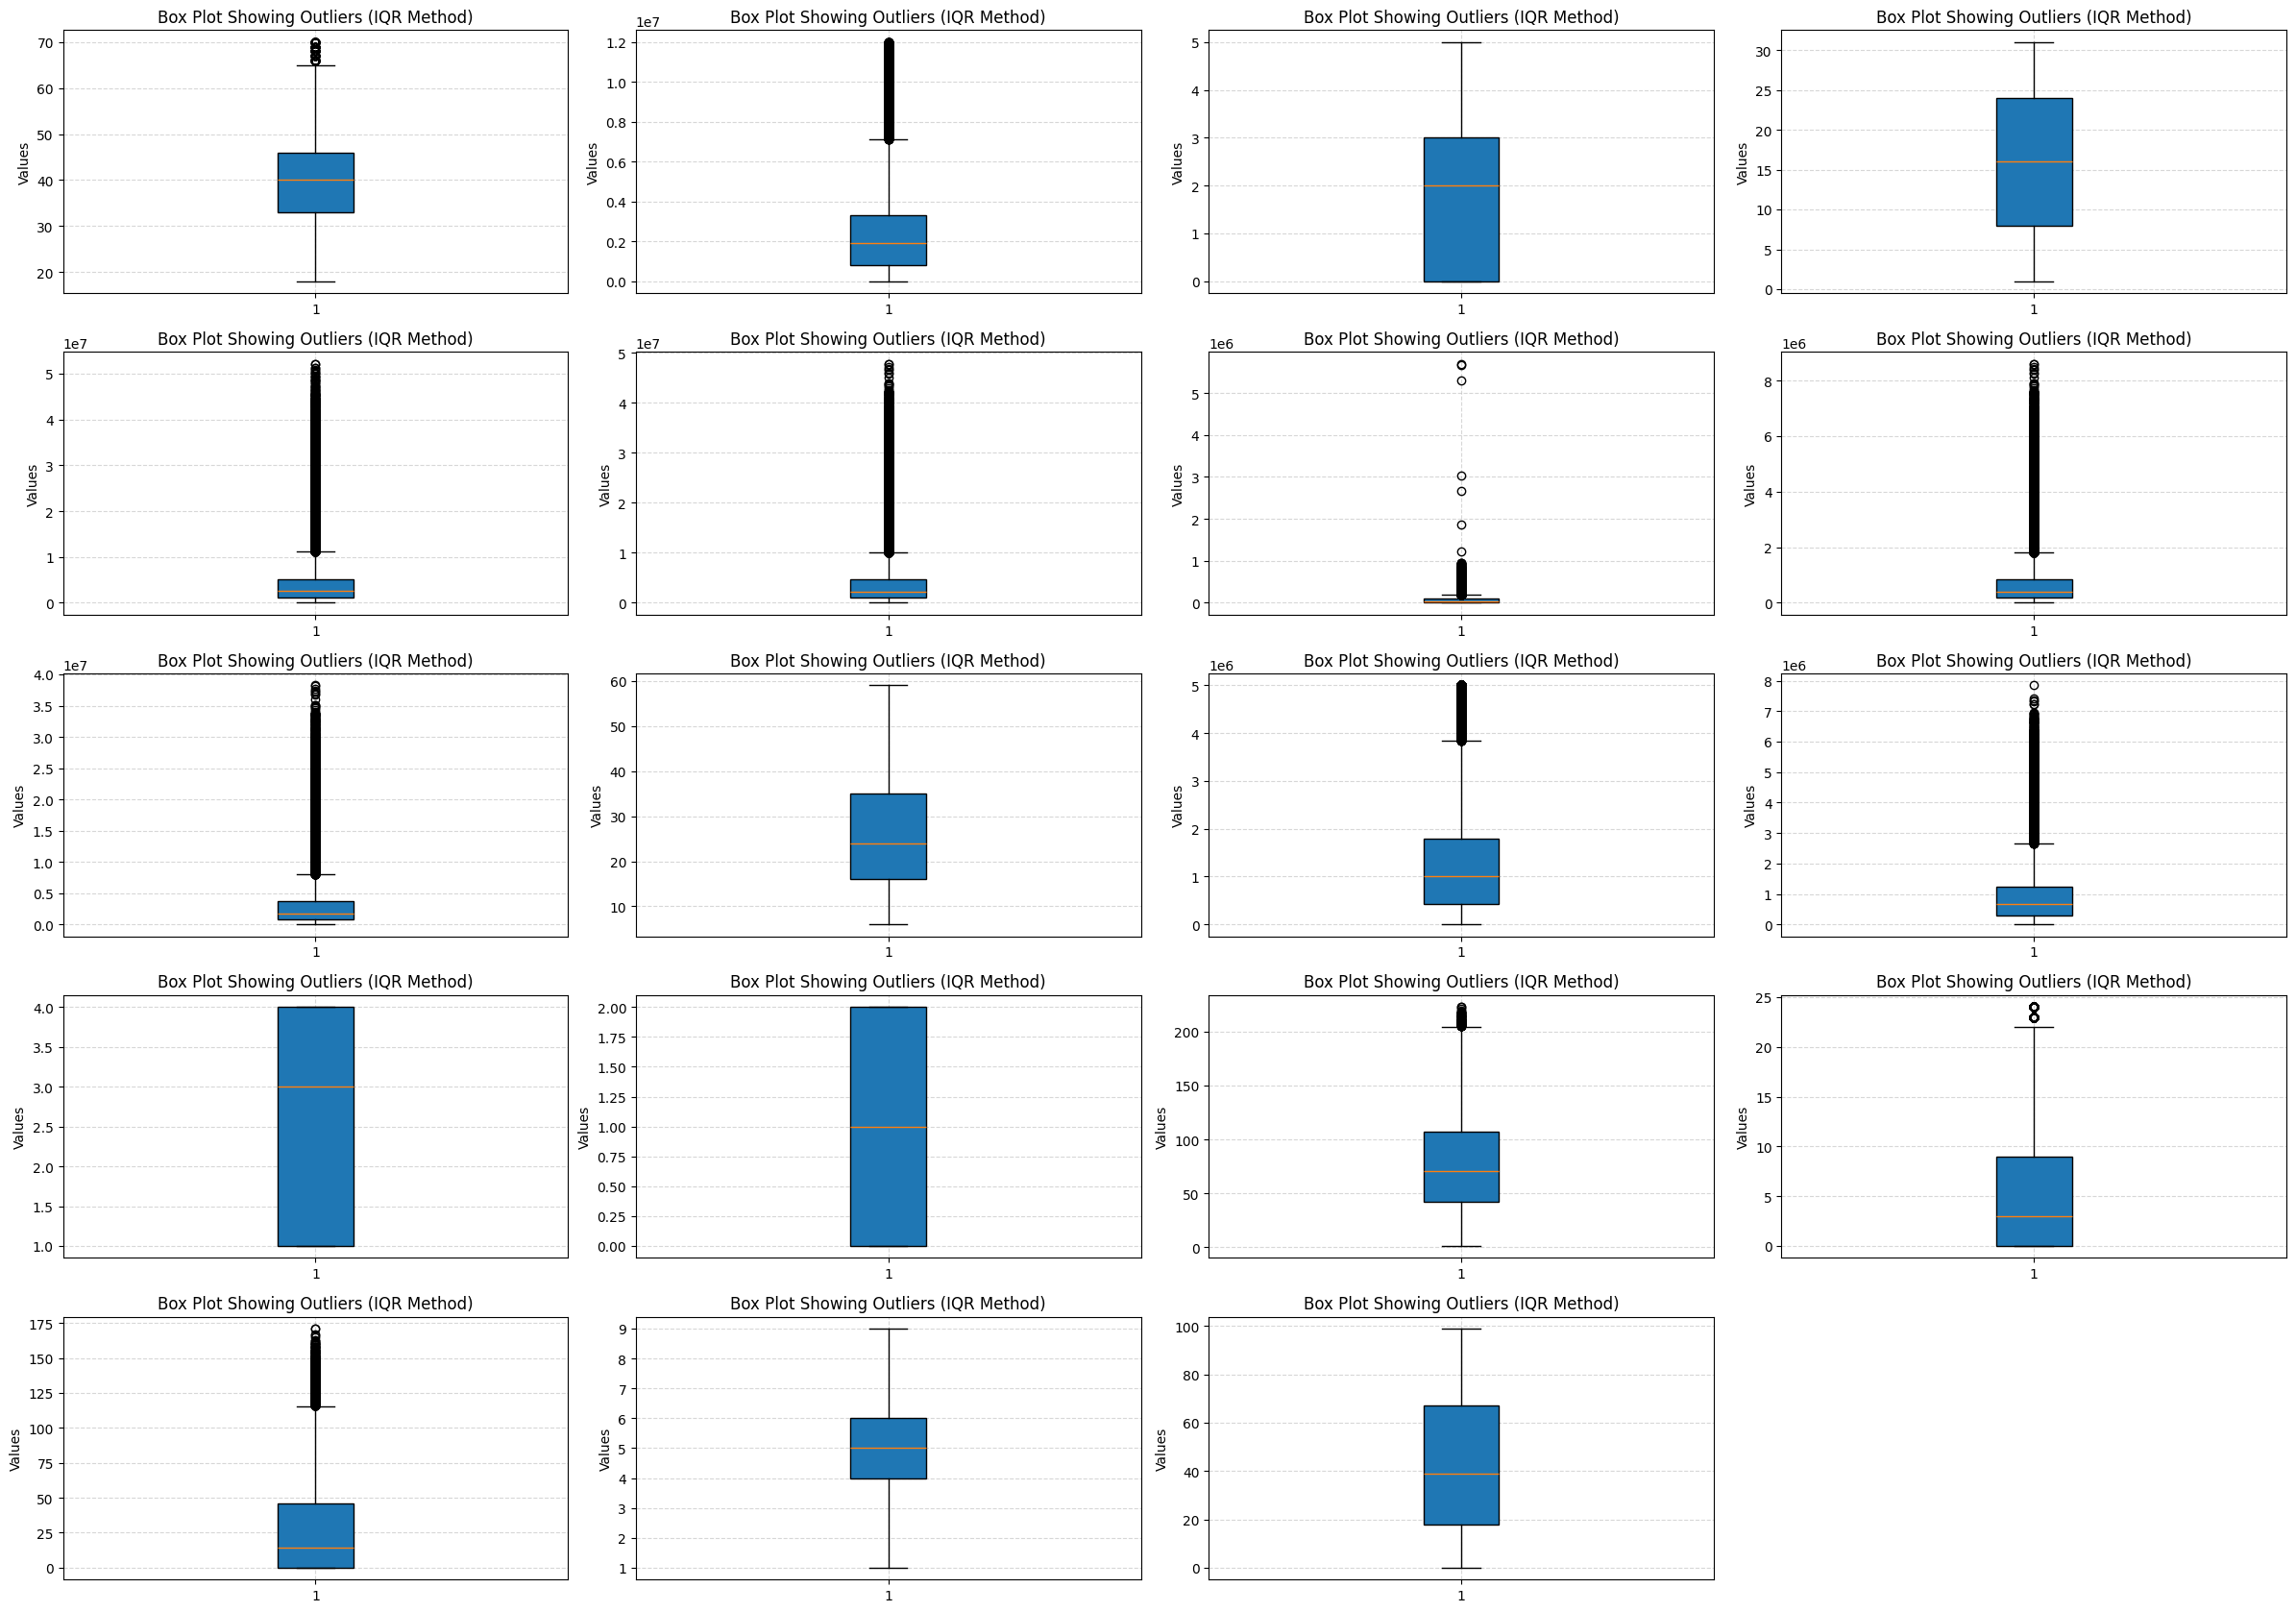

In [18]:
plt.figure(figsize=(24, 20))  # Width, height in inches
for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # --- BOXPLOT VISUALIZATION ---
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title("Box Plot Showing Outliers (IQR Method)")
    plt.ylabel("Values")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


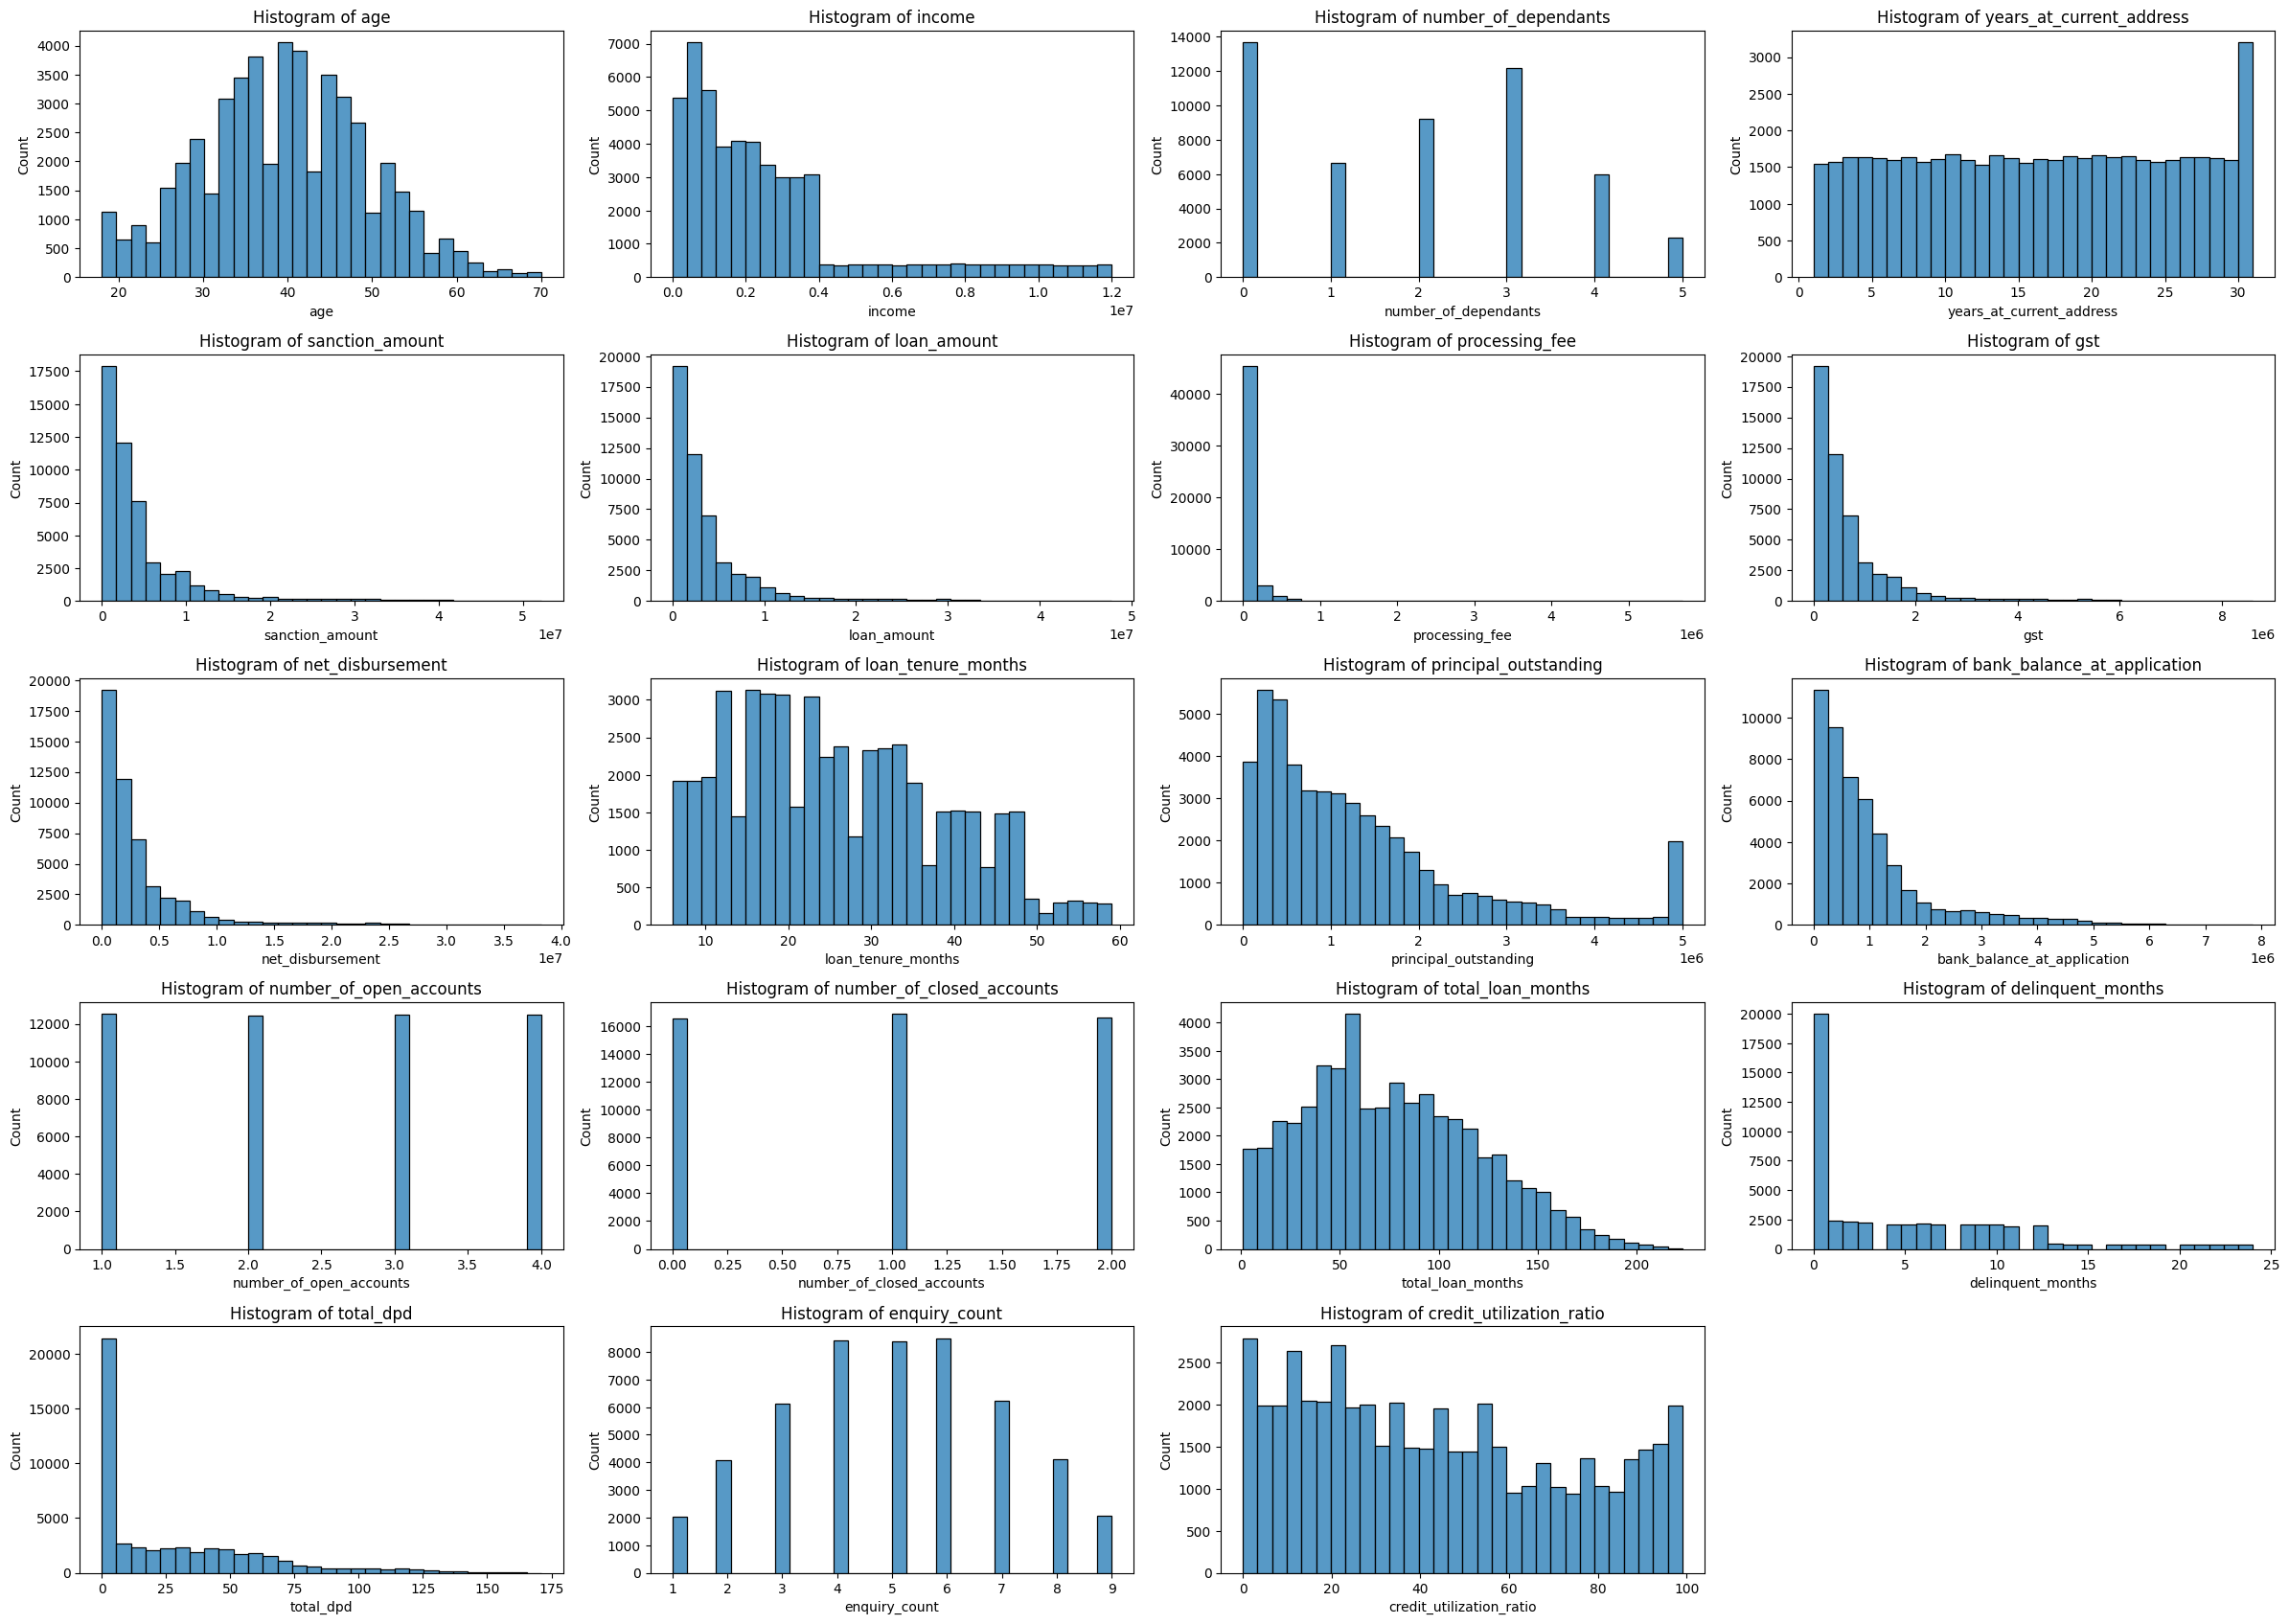

In [19]:
plt.figure(figsize=(24, 20))  # Width, height in inches
for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)
    sns.histplot(data=df, x=col, bins=30, kde=False)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
plt.tight_layout()
plt.show()


In [20]:
df.processing_fee.describe()

count     49938.00
mean      80488.96
std      117322.24
min           0.00
25%       19340.00
50%       44800.00
75%       92220.00
max     5698029.90
Name: processing_fee, dtype: float64

In [21]:
df[df.processing_fee>df.loan_amount][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52
12294,4639000,5698029.90
23981,2234000,2669791.02
28174,966000,1214492.67
29305,2616000,3036378.01
33705,3812000,5678020.86
47089,1738000,1858964.77


In [22]:
df[(df.processing_fee/df.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52
12294,4639000,5698029.90
23981,2234000,2669791.02
28174,966000,1214492.67
29305,2616000,3036378.01
33705,3812000,5678020.86
47089,1738000,1858964.77


In [23]:
df1 = df[(df.processing_fee/df.loan_amount)<0.03].copy()
df1.shape

(49923, 33)

In [24]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df1[(df1.gst/df1.loan_amount)>0.2].shape

(0, 33)

In [25]:
# Rule 2: Net disbursement should not be higher than loan_amount
df1[df1.net_disbursement>df1.loan_amount].shape

(0, 33)

In [26]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type']

In [27]:
for col in columns_categorical:
    print(col, "-->", df1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Delhi' 'Chennai' 'Kolkata' 'Bangalore' 'Pune' 'Jaipur' 'Lucknow'
 'Mumbai' 'Ahmedabad' 'Hyderabad']
state --> ['Delhi' 'Tamil Nadu' 'West Bengal' 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Uttar Pradesh' 'Gujarat' 'Telangana']
loan_purpose --> ['Auto' 'Home' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']


In [28]:
df1['loan_purpose'] = df1['loan_purpose'].replace('Personaal', 'Personal')
df1['loan_purpose'].unique()

array(['Auto', 'Home', 'Personal', 'Education'], dtype=object)

## EDA  

In [29]:
df1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,45627.00,39.76,9.87,18.00,33.00,40.00,46.00,70.00
1,4296.00,37.29,9.33,18.00,31.00,37.00,44.00,70.00


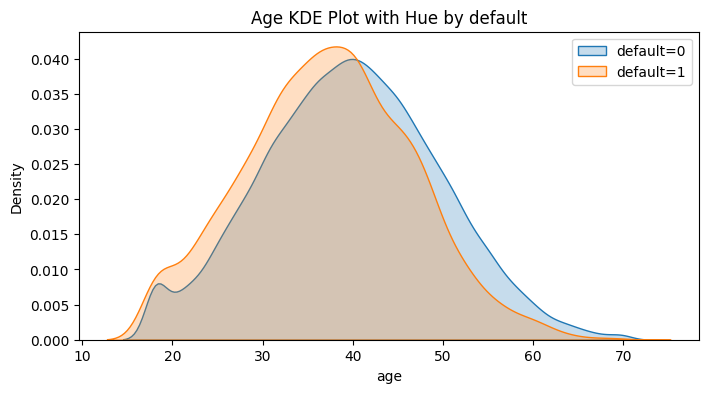

In [30]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1['age'][df1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df1['age'][df1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

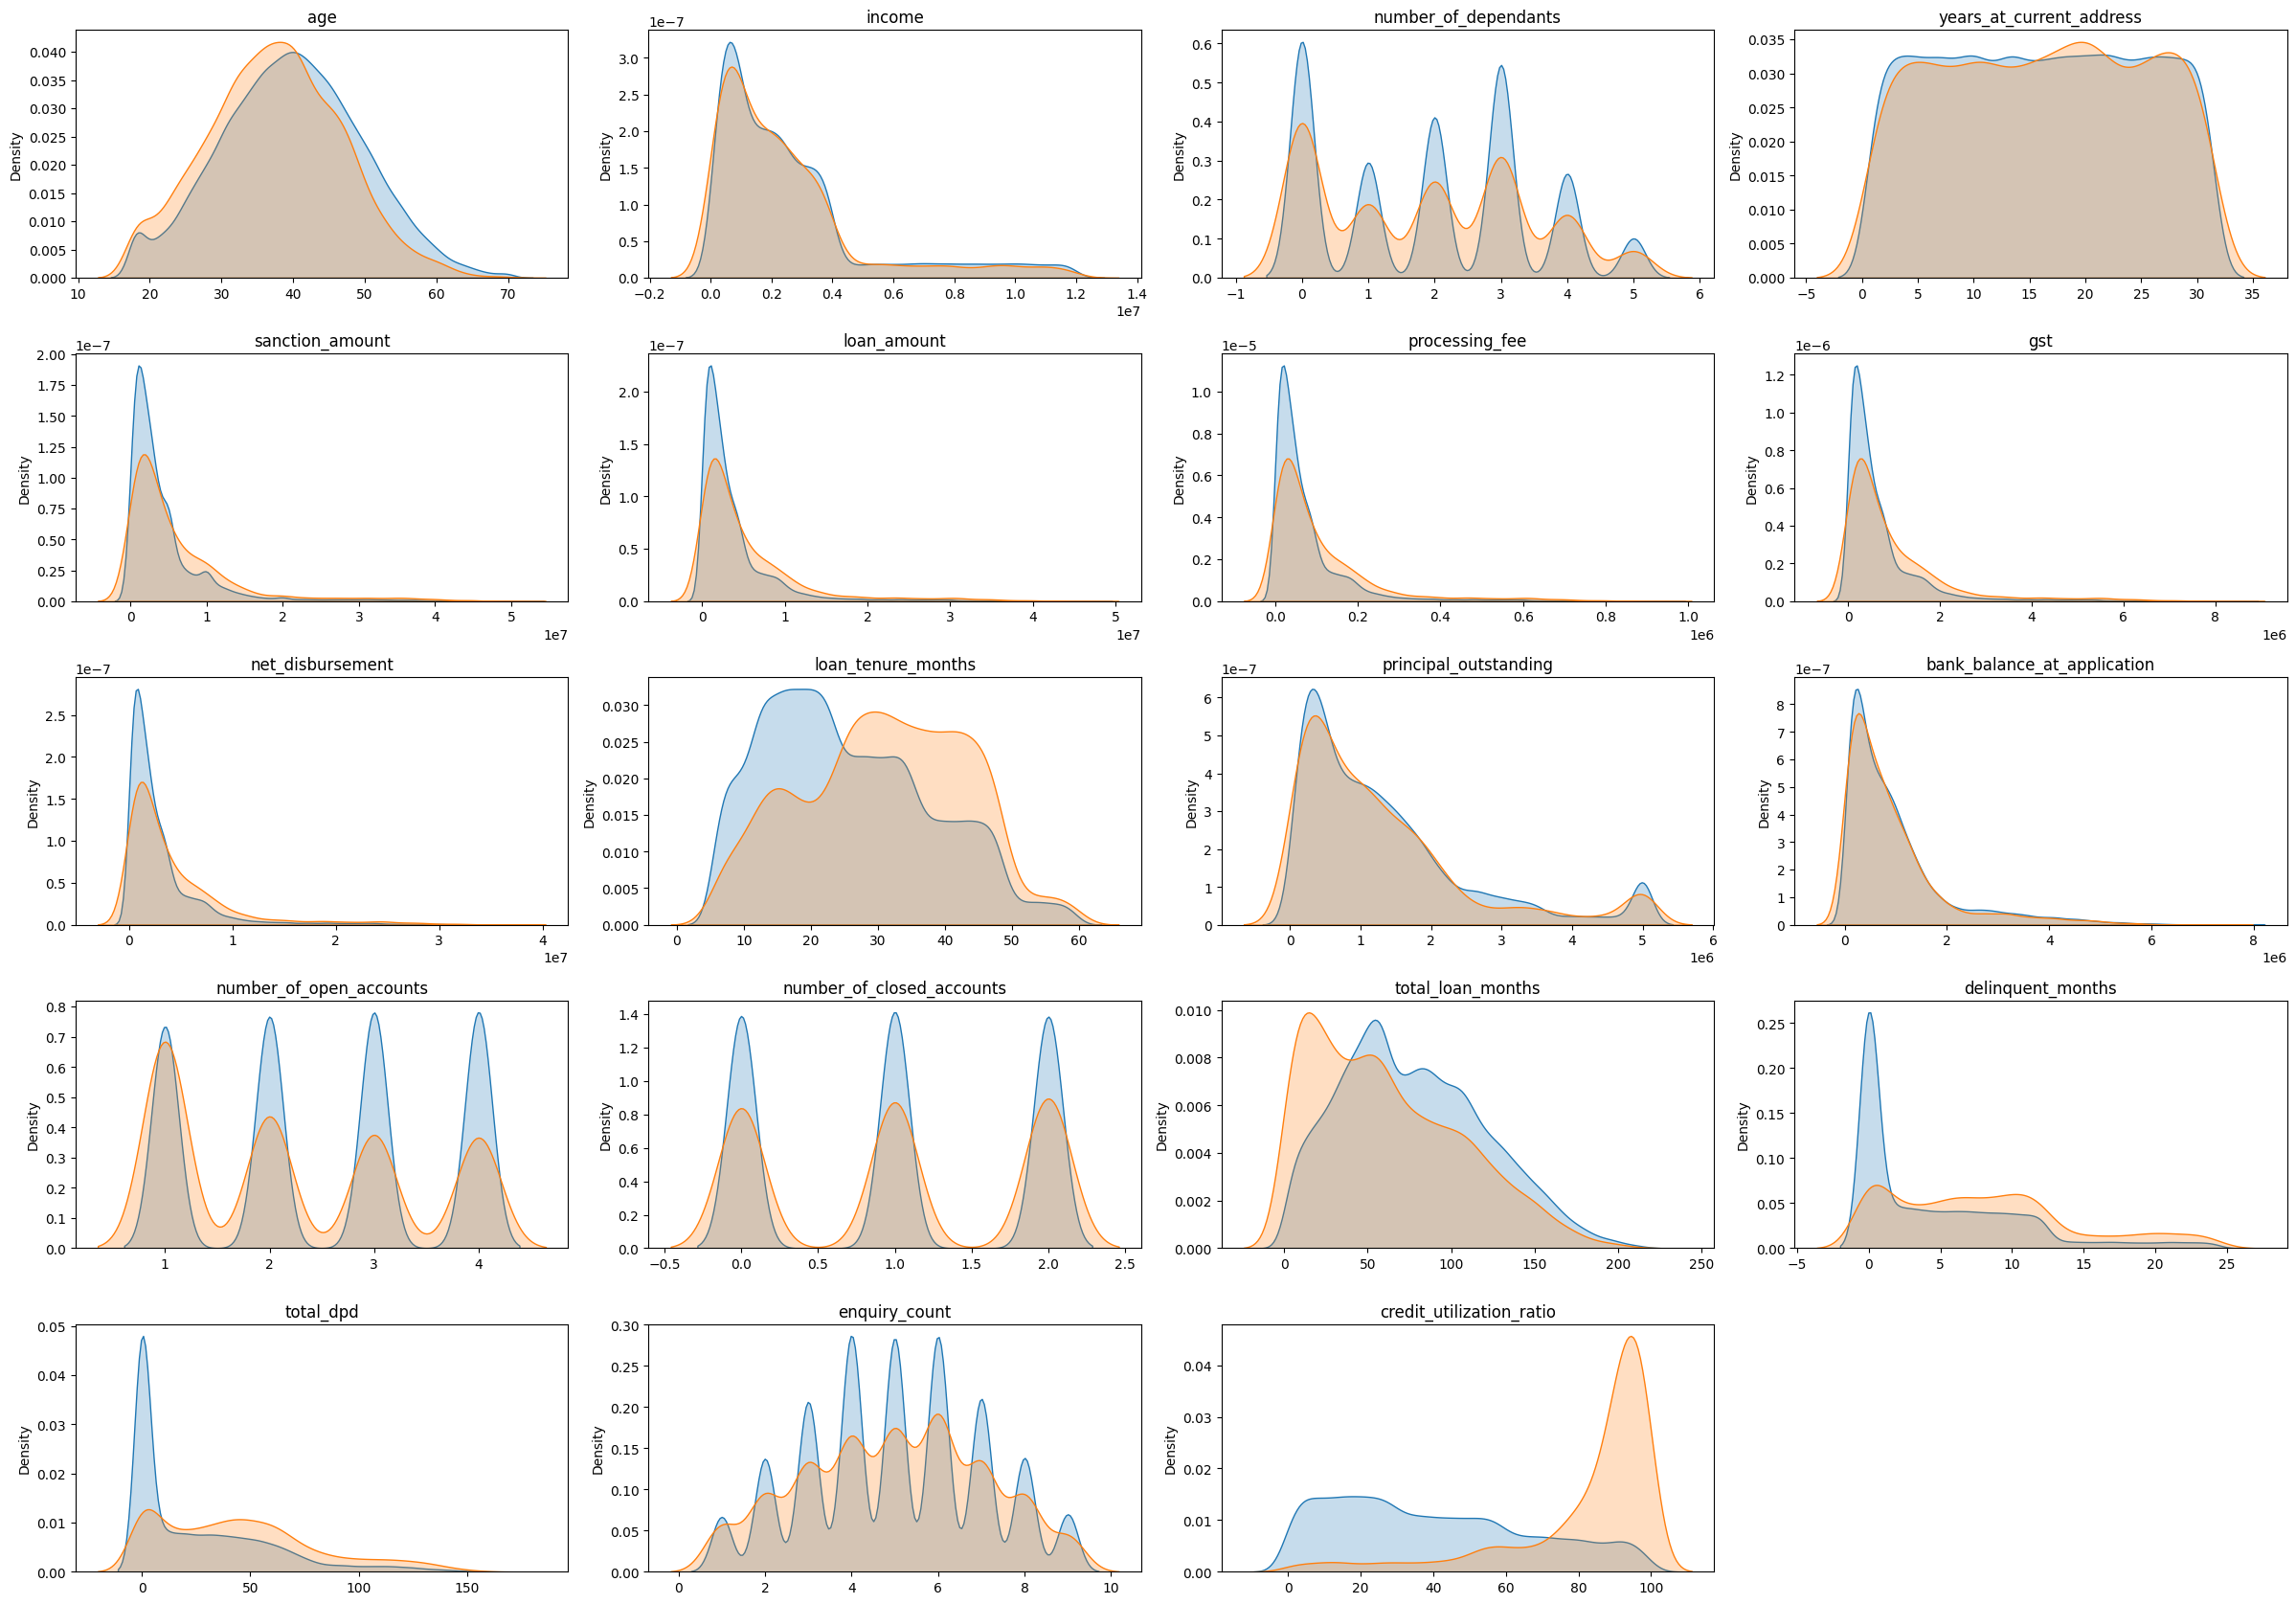

In [31]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df1[col][df1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df1[col][df1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

## Feature Engineering

In [32]:
df1[["loan_amount", "income"]].head(3)

,loan_amount,income
0,2467000,2586000
1,3883000,1206000
2,2170000,2878000


In [33]:
#creating a new feature 'loan_to_income' 
df1['loan_to_income'] = round(df1['loan_amount'] / df1['income'],2)
df1['loan_to_income'].describe()

count   49923.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.59
Name: loan_to_income, dtype: float64

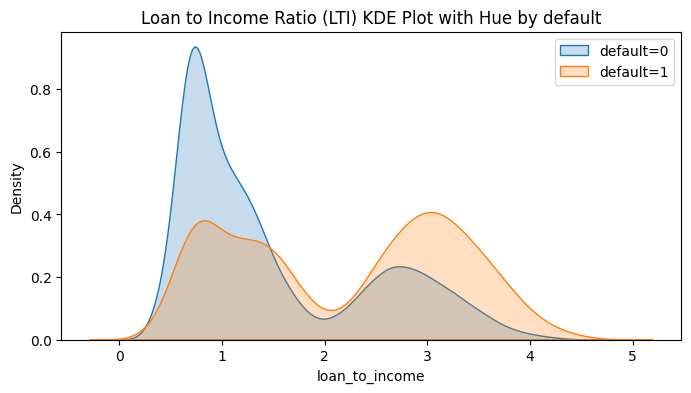

In [34]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1['loan_to_income'][df1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df1['loan_to_income'][df1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [35]:
df1[["delinquent_months", "total_loan_months"]]

,delinquent_months,total_loan_months
0,0,42
1,12,96
2,24,82
3,15,115
4,0,120
...,...,...
49995,1,165
49996,0,161
49997,0,42
49998,9,42


In [36]:
#creating new column 'deliquency_ratio'
df1["deliquency_ratio"] = (df1['delinquent_months'] * 100 / df1['total_loan_months']).round(1)
df1[["delinquent_months", "total_loan_months", "deliquency_ratio"]].head(3)

,delinquent_months,total_loan_months,deliquency_ratio
0,0,42,0.00
1,12,96,12.50
2,24,82,29.30


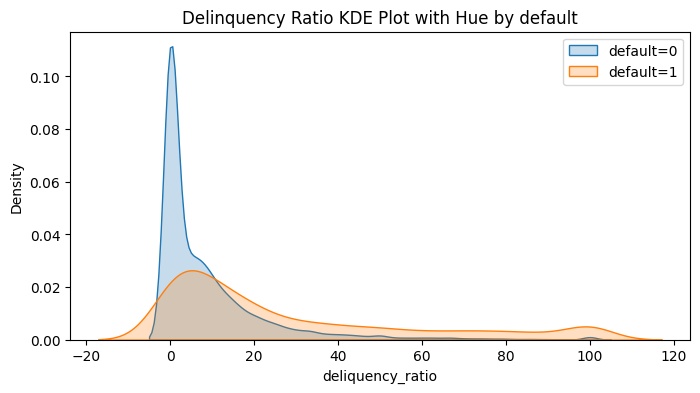

In [37]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1['deliquency_ratio'][df1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df1['deliquency_ratio'][df1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [38]:
df1["avg_dpd_per_delinquency"] = (df1["total_dpd"]/ df1["delinquent_months"]).round(1)
df1["avg_dpd_per_delinquency"].isna().sum()

np.int64(19964)

In [39]:
df1['avg_dpd_per_delinquency'] = np.where(
    df1['delinquent_months'] != 0,
    (df1['total_dpd'] / df1['delinquent_months']).round(1),
    0
)
df1['avg_dpd_per_delinquency'].describe()

count   49923.00
mean        3.30
std         2.90
min         0.00
25%         0.00
50%         4.30
75%         5.80
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

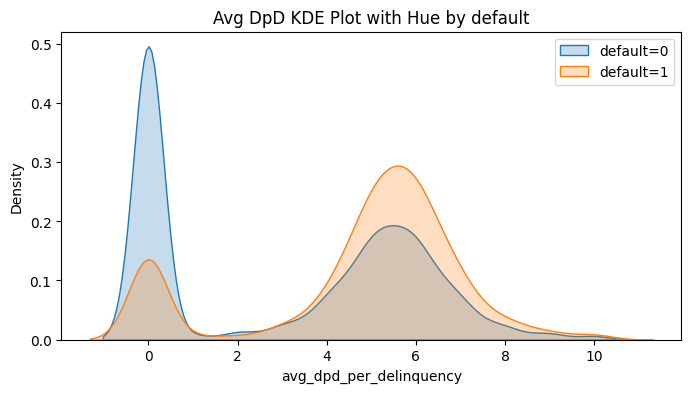

In [40]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df1[df1.default == 0]["avg_dpd_per_delinquency"], fill=True, label='default=0')
sns.kdeplot(df1[df1.default == 1]["avg_dpd_per_delinquency"], fill=True, label='default=1')
plt.title(f"Avg DpD KDE Plot with Hue by default")
plt.legend()
plt.show()

### Feature Selection

In [41]:
df2 = df1.drop(['cust_id', 'loan_id'],axis="columns")

In [42]:
df3 = df2.drop([ 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd', 'disbursal_date', 'installment_start_dt'], axis="columns")

In [43]:
df3.head(5)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_purpose,loan_type,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_delinquency
0,44,M,Married,Self-Employed,3,Owned,27,Delhi,Delhi,110001,Auto,Secured,3004000,49340.00,444060,1973600,33,1630408,873386,0,1,1,3,7,0.95,0.00,0.00
1,38,M,Married,Salaried,3,Owned,4,Chennai,Tamil Nadu,600001,Home,Secured,4161000,77660.00,698940,3106400,30,709309,464100,0,3,1,5,4,3.22,12.50,5.00
2,46,F,Married,Self-Employed,3,Owned,24,Kolkata,West Bengal,700001,Personal,Unsecured,2401000,43400.00,390600,1736000,21,1562399,1476042,0,2,1,6,58,0.75,29.30,6.10
3,55,F,Single,Self-Employed,1,Owned,15,Bangalore,Karnataka,560001,Personal,Unsecured,2345000,34940.00,314460,1397600,6,1257839,1031094,0,3,0,5,26,0.49,13.00,5.80
4,37,M,Married,Salaried,3,Owned,28,Pune,Maharashtra,411001,Auto,Secured,4647000,90400.00,813600,3616000,28,1772334,1032458,0,4,2,5,10,1.32,0.00,0.00


In [44]:
df3.shape

(49923, 27)

In [45]:
df3.select_dtypes(["int64", "float64"])

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_delinquency
0,44,3,27,110001,3004000,49340.00,444060,1973600,33,1630408,873386,0,1,1,3,7,0.95,0.00,0.00
1,38,3,4,600001,4161000,77660.00,698940,3106400,30,709309,464100,0,3,1,5,4,3.22,12.50,5.00
2,46,3,24,700001,2401000,43400.00,390600,1736000,21,1562399,1476042,0,2,1,6,58,0.75,29.30,6.10
3,55,1,15,560001,2345000,34940.00,314460,1397600,6,1257839,1031094,0,3,0,5,26,0.49,13.00,5.80
4,37,3,28,411001,4647000,90400.00,813600,3616000,28,1772334,1032458,0,4,2,5,10,1.32,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,40,2,11,600001,610000,10700.00,96300,428000,22,385199,178470,0,4,2,8,24,0.69,0.60,6.00
49996,39,0,9,700001,4211000,64860.00,583740,2594400,15,1656484,1040735,0,4,0,4,91,1.04,0.00,0.00
49997,45,0,27,560001,4097000,74800.00,673200,2992000,37,912691,355461,0,4,1,7,38,2.81,0.00,0.00
49998,42,2,20,500001,1871000,32600.00,293400,1304000,37,300035,179453,0,1,2,4,17,3.06,21.40,5.20


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49923 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          49923 non-null  int64  
 1   gender                       49923 non-null  object 
 2   marital_status               49923 non-null  object 
 3   employment_status            49923 non-null  object 
 4   number_of_dependants         49923 non-null  int64  
 5   residence_type               49923 non-null  object 
 6   years_at_current_address     49923 non-null  int64  
 7   city                         49923 non-null  object 
 8   state                        49923 non-null  object 
 9   zipcode                      49923 non-null  int64  
 10  loan_purpose                 49923 non-null  object 
 11  loan_type                    49923 non-null  object 
 12  sanction_amount              49923 non-null  int64  
 13  processing_fee       

In [47]:
df3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [62]:
X = df3.drop("default", axis = "columns")
Y = df3["default"]
X
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X.select_dtypes(["int64", "float64"]).columns
cols_to_scale
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

## Multicollinearity Analysis

- used for finding multicolinearity
- VIF means *VARIANCE INFLATION FACTOR* mostly used for finding multi colinearity between variables
- the columns with high VIF are related to each other means they have Multi Collinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [64]:
calculate_vif(X[cols_to_scale])

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.37
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.13
9,principal_outstanding,16.24


### Insight By VIF Factor
- processing_fee, gst, net_disbursement are tightly related to loan amount and we get infinite vif factor and the upper error
RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
- Principal_outstanding and sanction amount are also much related to loan_to_income so need to drop that columns as well

In [65]:
features_vif_drop = ["sanction_amount", "processing_fee", "gst", "net_disbursement", "principal_outstanding"]

X_1 = X.drop(features_vif_drop, axis = 'columns')

In [66]:
numeric_cols = X_1.select_dtypes(["int64", "float64"]).columns
numeric_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [67]:
vif_df = calculate_vif(X_1[numeric_cols])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.72
2,years_at_current_address,3.41
3,zipcode,3.78
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.33
7,number_of_closed_accounts,2.37
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [68]:
selected_vif_features = vif_df.Column.values
selected_vif_features

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

## Correlation Analysis

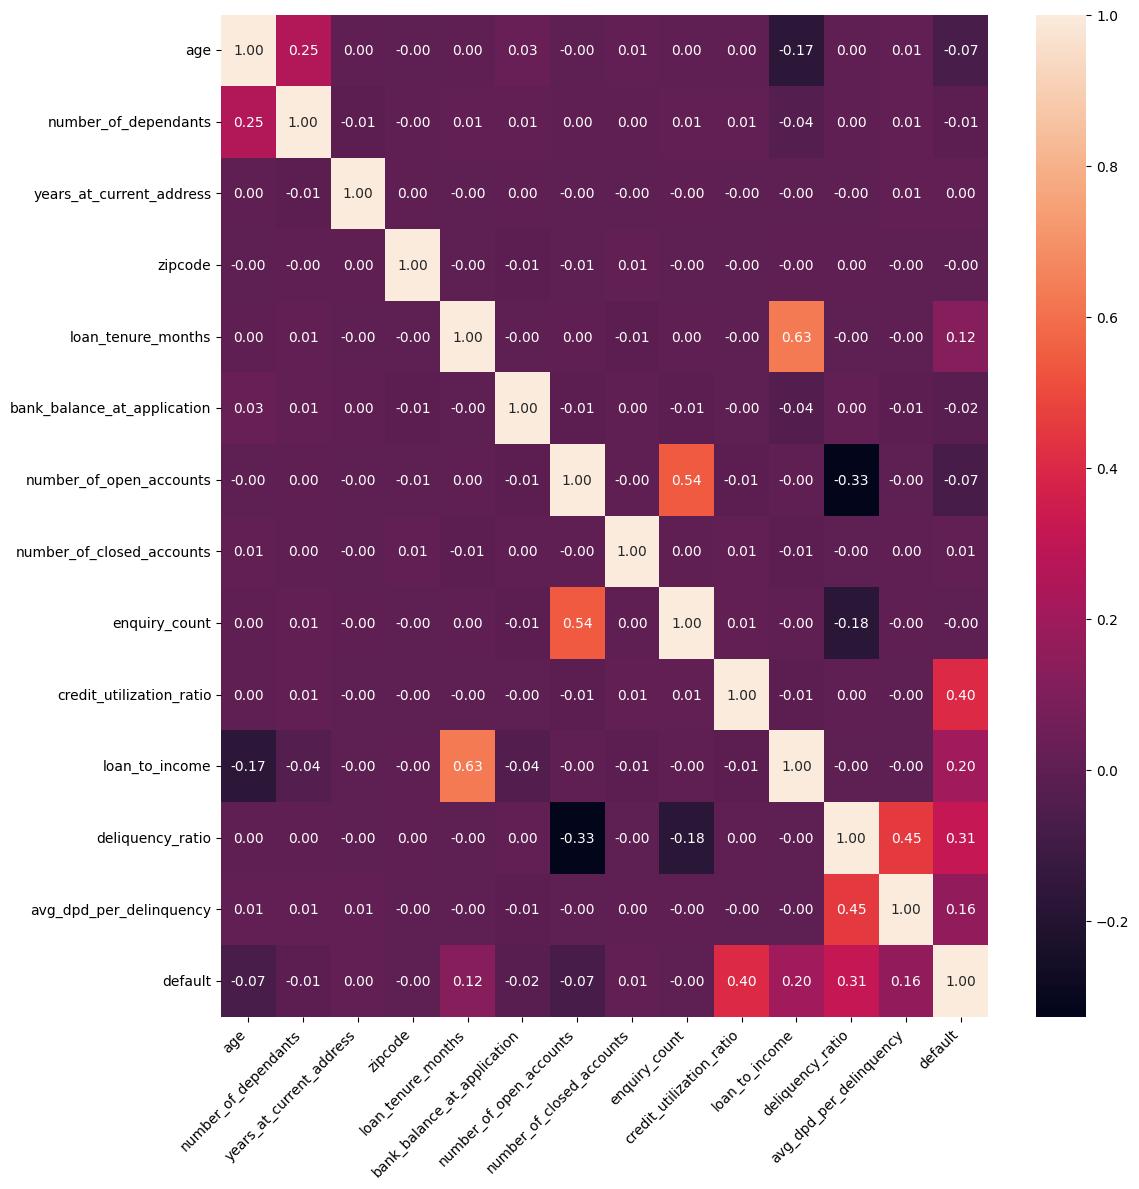

In [69]:
plt.figure(figsize=(12,12))
cm = df3[numeric_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight
- KDE plot and correlation matrix kind of gives same information about important features or strong features and both helps to understand which are the important features

In [70]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type']

## Insight And Techinques to check categorical columns affect target Variable

-- These are the statistical techniques popularly used in Credit Risk Modelling this are popular techniques that give us info that how categorical variables affect the target variable
-- For Continuous variables we can use Correlation Coefficient and Variance Inflamation Factor
-- But for Categorical Variables we need to use Weight of Evidence and Information value these are mostly used in classification problems like Credit Risk Modelling

1) Weight Of Evidence(WOE)
- proportion of good = approved value/total approved
- proportion of bad = Denied value / total denied 
- formula(WOE) = ln(proportion of good/ proportion of bad)

2) Information Value(IV)
- IV helps quantify predictive power of a categorical Feature
- can be used for continuous features by taking continuous values and converting them into beans that means converting continuous to categorical
- Formula(IV) = WOE * (proportion of good - proportion of bad)
- total IV = sum of all IV of all categories
- Discard the feature if
1) Sum of IV < 0.02 --> very less predictive power -- ignore / discard the feature
2) 0.02 -> 0.1 --> weak predictive power
3) 0.1 -> 0.3 --> Medium
4) 0.3 -> 0.5 --> Strong
5) IV >= 0.5 --> Very Strong




In [71]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_1, Y],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,9922,426,9496,0.10,0.21,-0.74,0.08
Education,7547,744,6803,0.17,0.15,0.15,0.00
Home,15006,2332,12674,0.54,0.28,0.67,0.18
Personal,17448,794,16654,0.18,0.37,-0.68,0.12


In [72]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49923 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          49923 non-null  float64
 1   gender                       49923 non-null  object 
 2   marital_status               49923 non-null  object 
 3   employment_status            49923 non-null  object 
 4   number_of_dependants         49923 non-null  float64
 5   residence_type               49923 non-null  object 
 6   years_at_current_address     49923 non-null  float64
 7   city                         49923 non-null  object 
 8   state                        49923 non-null  object 
 9   zipcode                      49923 non-null  float64
 10  loan_purpose                 49923 non-null  object 
 11  loan_type                    49923 non-null  object 
 12  loan_tenure_months           49923 non-null  float64
 13  bank_balance_at_appli

In [73]:
iv_values = {}

for feature in X_1.columns:
    if X_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_1, Y],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, Y],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07456588367537151),
 'gender': np.float64(0.0003875269042697458),
 'marital_status': np.float64(0.0018951724360055482),
 'employment_status': np.float64(0.002984774699700006),
 'number_of_dependants': np.float64(0.003458627827410388),
 'residence_type': np.float64(0.24660377055484295),
 'years_at_current_address': np.float64(0.0016058711392441028),
 'city': np.float64(0.001426750845830878),
 'state': np.float64(0.0012951883473491651),
 'zipcode': np.float64(0.0013840275629168608),
 'loan_purpose': np.float64(0.38458503429422874),
 'loan_type': np.float64(0.16762011439930746),
 'loan_tenure_months': np.float64(0.22015100531762907),
 'bank_balance_at_application': np.float64(0.005730097612415105),
 'number_of_open_accounts': np.float64(0.08325626405729196),
 'number_of_closed_accounts': np.float64(0.0008235393949359152),
 'enquiry_count': np.float64(0.007618414985255662),
 'credit_utilization_ratio': np.float64(2.4134859207488883),
 'loan_to_income': np.float64(0.478

In [74]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.413
19,deliquency_ratio,0.702
18,loan_to_income,0.479
20,avg_dpd_per_delinquency,0.406
10,loan_purpose,0.385
5,residence_type,0.247
12,loan_tenure_months,0.220
11,loan_type,0.168
14,number_of_open_accounts,0.083
0,age,0.075


In [75]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'deliquency_ratio',
 'avg_dpd_per_delinquency']

## Feature Encoding
-- here we do dummy encoding of all relevant columns

In [76]:
X_reduced = X_1[selected_features_iv]
X_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_delinquency
0,0.500,Owned,Auto,Secured,0.509,0.000,0.071,0.152,0.000,0.000
1,0.385,Owned,Home,Secured,0.453,0.667,0.040,0.681,0.125,0.500
2,0.538,Owned,Personal,Unsecured,0.283,0.333,0.586,0.105,0.293,0.610
3,0.712,Owned,Personal,Unsecured,0.000,0.667,0.263,0.044,0.130,0.580
4,0.365,Owned,Auto,Secured,0.415,1.000,0.101,0.238,0.000,0.000


In [77]:
# One hot Encoding using get_dummies
X_encoded = pd.get_dummies(X_reduced, drop_first = True)
X_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.500,0.509,0.000,0.071,0.152,0.000,0.000,True,False,False,False,False,False
1,0.385,0.453,0.667,0.040,0.681,0.125,0.500,True,False,False,True,False,False
2,0.538,0.283,0.333,0.586,0.105,0.293,0.610,True,False,False,False,True,True
3,0.712,0.000,0.667,0.263,0.044,0.130,0.580,True,False,False,False,True,True
4,0.365,0.415,1.000,0.101,0.238,0.000,0.000,True,False,False,False,False,False


In [78]:
Y.value_counts()

default
0    45627
1     4296
Name: count, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_encoded, Y)

In [80]:
y_res.value_counts()

default
0    45627
1    45627
Name: count, dtype: int64

## Train Test Split

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
def logistic_model():
    model = LogisticRegression(
    penalty='elasticnet',
    C=0.3,              # smaller C → stronger regularization
    l1_ratio=0.5,       # balance L1 & L2
    solver='saga',
    max_iter=500,
    class_weight='balanced',
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [83]:
from sklearn.svm import SVC


def svm_model():
    model = SVC(
    C=0.5,              # strong regularization
    kernel='rbf',
    gamma=0.05,         # smooth decision boundary
    probability=True,
    class_weight='balanced',
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [84]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_model():
    model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=25,
    min_samples_split=50,
    ccp_alpha=0.01,
    class_weight='balanced',
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [85]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_model():
    model = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,
    min_samples_leaf=10,
    min_samples_split=20,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [86]:
from xgboost import XGBClassifier

def xgboost_model():
    model = XGBClassifier(
        max_depth=3,
    learning_rate=0.01,
    n_estimators=400,
    reg_alpha=0.5,
    reg_lambda=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [87]:
from catboost import CatBoostClassifier

def catboost_model():
    model = CatBoostClassifier(
    depth=5,
    learning_rate=0.03,
    iterations=400,
    l2_leaf_reg=6,        # ≈ reg_lambda
    random_strength=1,
    bagging_temperature=0.8,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=0,
    random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [88]:
models = [
    {"name": "Logistic Regression", "model": logistic_model()},
    {"name": "SVM Model ", "model": svm_model()},
    {"name": "decision tree model", "model": decision_tree_model()},
    {"name": "random forest model", "model": random_forest_model()},
    {"name": "catboost model", "model": catboost_model()},
    {"name": "xgboost model", "model": xgboost_model()}
]

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def format_result(result):
    return f"{result * 100:.2f}%"

def test_evaluation_result(model_info):
    name = model_info["name"]
    model = model_info["model"]

    y_pred = model.predict(X_test)
    
    accuracy = format_result(accuracy_score(y_test, y_pred))
    precision = format_result(precision_score(y_test, y_pred))
    recall = format_result(recall_score(y_test, y_pred))
    f1 = format_result(f1_score(y_test, y_pred))

    return accuracy, precision, recall, f1

def train_accuracy(model_info):
    name = model_info["name"]
    model = model_info["model"]

    y_train_pred = model.predict(X_train)
    train_acc = format_result(accuracy_score(y_train, y_train_pred))

    return train_acc
    

In [90]:
evaluate_test = []
evaluate_train = []
for model in models:
    accuracy, precision, recall, f1 = test_evaluation_result(model)
    evaluate_test.append({
        "model_name" : model["name"],
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1_score" : f1
    })

    train_acc = train_accuracy(model)
    evaluate_train.append({
        "model_name" : model["name"],
        "accuracy" : train_acc
    })

In [91]:
evaluation_test = pd.DataFrame(evaluate_test)
evaluation_test

,model_name,accuracy,precision,recall,f1_score
0,Logistic Regression,94.30%,92.62%,96.27%,94.41%
1,SVM Model,94.60%,91.76%,98.01%,94.79%
2,decision tree model,88.36%,87.17%,89.96%,88.55%
3,random forest model,94.36%,91.22%,98.19%,94.57%
4,catboost model,96.62%,94.96%,98.48%,96.69%
5,xgboost model,94.37%,91.23%,98.19%,94.58%


In [92]:
evaluation_train = pd.DataFrame(evaluate_train)
evaluation_train

,model_name,accuracy
0,Logistic Regression,94.34%
1,SVM Model,94.79%
2,decision tree model,88.43%
3,random forest model,94.64%
4,catboost model,96.88%
5,xgboost model,94.54%


In [116]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [117]:
X_test.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [95]:
X_train.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [118]:
import pickle

final_model = logistic_model()
model_data = {
    'model': final_model,
    'features': X_train.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
with open("credit_model.pkl", "wb") as file:
    pickle.dump(model_data, file)

In [119]:
import openpyxl
df.to_excel("dataset1.xlsx", index=False)

In [120]:
final_model.coef_, final_model.intercept_

(array([[-0.24970424,  0.36913301,  0.89254872, 14.23145746, 14.04161661,
         12.0411708 ,  1.9691787 , -1.69526066,  1.67007569,  1.04941087,
         -2.27460819,  0.83664608,  0.83664608]]),
 array([-17.96373042]))